In [84]:
!pip install -U imbalanced-learn

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os
import PIL
import cv2
import time
import shutil
import random
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import RandomOverSampler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Lambda

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [85]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
train_dir ='/content/drive/My Drive/my_dataset/dataset'
validation_dir = '/content/drive/My Drive/my_dataset/val'

In [61]:
#nitial_epochs= 10

#fine_tune_epochs= 60

#total_epochs =  initial_epochs + fine_tune_epochs

#base_learning_rate = 0.0001

#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            #patience=3,
                                            #verbose=1)

In [113]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical'
)

Found 102 images belonging to 3 classes.
Found 17 images belonging to 3 classes.


In [121]:
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=tf.keras.layers.Input(shape=(224, 224, 3)))
base_model.trainable = False  # Freeze the convolutional base

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Adjust for number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [122]:
# Ensure steps_per_epoch and validation_steps are not zero
steps_per_epoch = max(1, train_generator.samples // train_generator.batch_size)
validation_steps = max(1, validation_generator.samples // validation_generator.batch_size)

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

#history = model.fit(
#    train_generator,
#    steps_per_epoch=steps_per_epoch,
#    epochs=initial_epochs,
#    validation_data=validation_generator,
#    validation_steps=validation_steps

#)

Epoch 1/30
1/1 [==============================] - 30s 30s/step - loss: 1.3625 - accuracy: 0.3333 - val_loss: 2.1341 - val_accuracy: 0.3529
Epoch 2/30
1/1 [==============================] - 24s 24s/step - loss: 2.2864 - accuracy: 0.3627 - val_loss: 1.2158 - val_accuracy: 0.5294
Epoch 3/30
1/1 [==============================] - 26s 26s/step - loss: 1.4412 - accuracy: 0.4412 - val_loss: 0.9890 - val_accuracy: 0.5882
Epoch 4/30
1/1 [==============================] - 26s 26s/step - loss: 1.1602 - accuracy: 0.4706 - val_loss: 1.3038 - val_accuracy: 0.3529
Epoch 5/30
1/1 [==============================] - 24s 24s/step - loss: 1.7000 - accuracy: 0.3627 - val_loss: 0.8891 - val_accuracy: 0.5882
Epoch 6/30
1/1 [==============================] - 28s 28s/step - loss: 1.1232 - accuracy: 0.4020 - val_loss: 0.7609 - val_accuracy: 0.6471
Epoch 7/30
1/1 [==============================] - 26s 26s/step - loss: 0.9940 - accuracy: 0.4804 - val_loss: 0.9350 - val_accuracy: 0.6471
Epoch 8/30
1/1 [===========

In [109]:
model.save('/content/drive/My Drive/resnet50_e30_bs128_dense2048.h5')


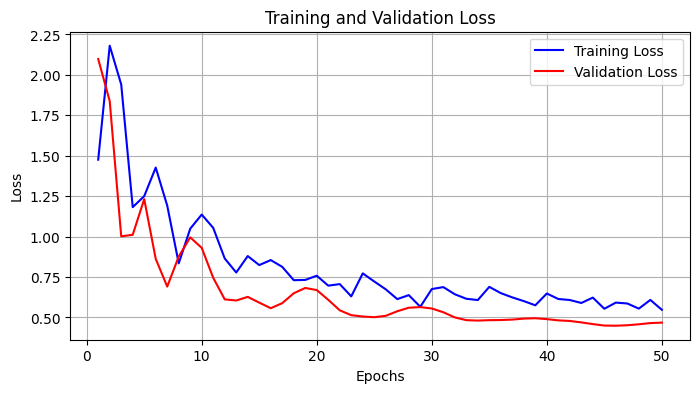

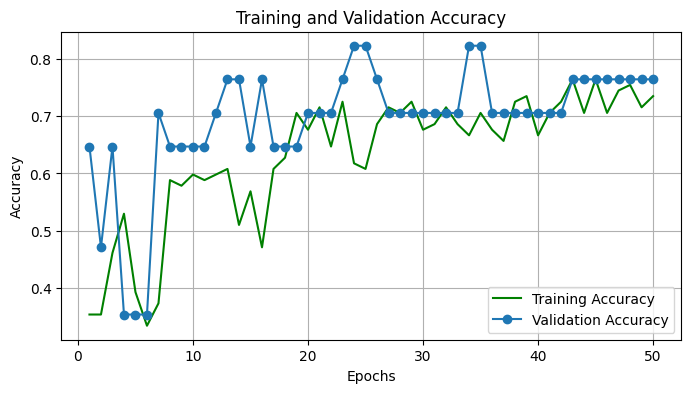

In [116]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Draw the loss graph
plt.figure(figsize=(8, 4))
plt.plot(epochs, train_loss, 'b-', label='Training Loss')  # Added 'b-' for blue solid line
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')  # Added 'r-' for red solid line
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)  # Added grid for better readability
plt.show()

# Draw the accuracy graph
plt.figure(figsize=(8, 4))
plt.plot(epochs, train_accuracy, 'g-', label='Training Accuracy')  # Added 'g-' for green solid line
plt.plot(epochs, val_accuracy, 'o-', label='Validation Accuracy')  # Added 'o-' for line with circle markers
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)  # Added grid for better readability
plt.show()

In [110]:


def evaluate_model(model, validation_generator):
    results = model.evaluate(validation_generator, verbose=0)
    loss = results[0]
    acc = results[1]

    print("    Test Loss: {:.5f}".format(loss))
    print("Test Accuracy: {:.2f}%".format(acc * 100))



    # Extract the actual labels from the test dataset
    # Extract the prediction labels from the test dataset

    y_pred = []
    y_true = []

    for batch_images, batch_labels in validation_generator:
       y_true.extend(batch_labels)
       batch_predictions = model.predict(batch_images)
       batch_pred_labels = np.argmax(batch_predictions, axis=1)
       y_pred.extend(batch_pred_labels)


    #creat confusion matrix
    confusion = confusion_matrix(y_true, y_pred)


    #plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    classification_rep = classification_report(y_true, y_pred, target_names=class_names)
    print("Classification Report:\n", classification_rep)

    return acc

In [111]:
acc_resNet50=evaluate_model(model, validation_generator)

    Test Loss: 0.51420
Test Accuracy: 70.59%
1/1 [==============================] - 4s 4s/step


KeyboardInterrupt: 

In [81]:
# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'class_names' is not defined

<Figure size 1000x700 with 0 Axes>

In [43]:
base_model.trainable = True

# Print the number of layers in the ResNet50 pre-trained model
print(f"{len(base_model.layers)} layers in ResNet50_pretrained_model")

175 layers in ResNet50_pretrained_model


In [57]:
fine_tune_at = 165

# Freeze all the layers before the `fine_tune_at` layer
for layer in model.layers[:fine_tune_at]:
  layer.trainable = False

# compile fine tune model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Fit fine tune model
history_fine = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=total_epochs,
     initial_epoch=history.epoch[-1],
    validation_data=validation_generator,
    validation_steps=validation_steps
)


Epoch 10/70
3/3 [==============================] - 27s 8s/step - loss: 0.8252 - accuracy: 0.6354 - val_loss: 0.6189 - val_accuracy: 0.6471
Epoch 11/70
3/3 [==============================] - 19s 9s/step - loss: 0.8035 - accuracy: 0.6714 - val_loss: 0.6189 - val_accuracy: 0.6471
Epoch 12/70
3/3 [==============================] - 21s 7s/step - loss: 0.8576 - accuracy: 0.6146 - val_loss: 0.6189 - val_accuracy: 0.6471
Epoch 13/70
3/3 [==============================] - 17s 8s/step - loss: 0.9706 - accuracy: 0.5571 - val_loss: 0.6189 - val_accuracy: 0.6471
Epoch 14/70
3/3 [==============================] - 18s 5s/step - loss: 0.8791 - accuracy: 0.6429 - val_loss: 0.6189 - val_accuracy: 0.6471
Epoch 15/70
3/3 [==============================] - 18s 5s/step - loss: 0.9186 - accuracy: 0.5429 - val_loss: 0.6189 - val_accuracy: 0.6471
Epoch 16/70
3/3 [==============================] - 17s 5s/step - loss: 0.8825 - accuracy: 0.5714 - val_loss: 0.6189 - val_accuracy: 0.6471
Epoch 17/70
3/3 [==========

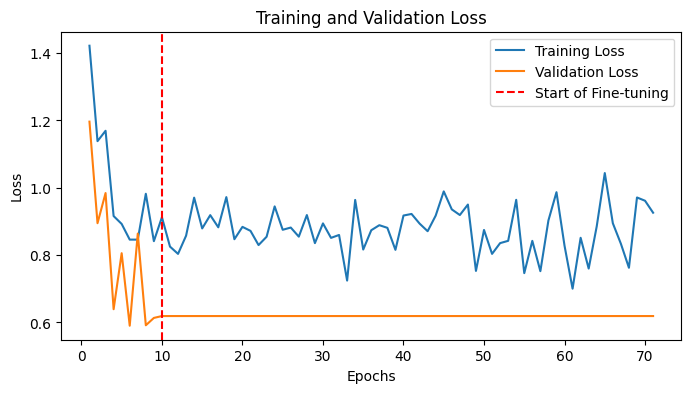

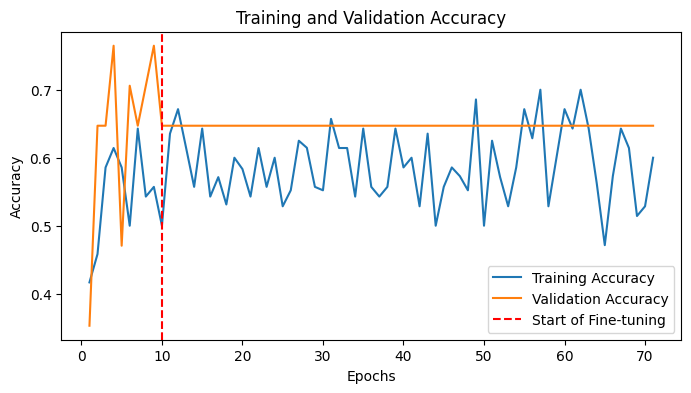

In [58]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Combine training and validation loss
train_loss_fine = history_fine.history['loss']
val_loss_fine = history_fine.history['val_loss']
train_loss_combined = train_loss + train_loss_fine
val_loss_combined = val_loss + val_loss_fine

# Combine training and validation accuracy
train_accuracy_fine = history_fine.history['accuracy']
val_accuracy_fine = history_fine.history['val_accuracy']
train_accuracy_combined = train_accuracy + train_accuracy_fine
val_accuracy_combined = val_accuracy + val_accuracy_fine

# Number of epochs for both stages
total_epochs = len(train_loss_combined)
fine_tune_epoch = len(train_loss)

# Draw the combined loss graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, total_epochs + 1), train_loss_combined, label='Training Loss')
plt.plot(range(1, total_epochs + 1), val_loss_combined, label='Validation Loss')
plt.axvline(fine_tune_epoch, color='r', linestyle='--', label='Start of Fine-tuning')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Draw the combined accuracy graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, total_epochs + 1), train_accuracy_combined, label='Training Accuracy')
plt.plot(range(1, total_epochs + 1), val_accuracy_combined, label='Validation Accuracy')
plt.axvline(fine_tune_epoch, color='r', linestyle='--', label='Start of Fine-tuning')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/My Drive/resnet50_fine_1020.h5')